# Logistic Regression



## Overview

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. Logistic regression is a linear model for binary classification but can be extended to multiclass classification - OvR or multiple units methods.

## Logistic Regression Model

Let $\mathbf{x}$ be input features and $\mathbf{w}$ and $b$ corresponding weight vector and bias:

$\mathbf{x}\in\mathbb{R}^n\,\,, \mathbf{w}\in\mathbb{R}^n\,\,, b\in\mathbf{R}$


Logistic regression outputs

$\sigma(z)=\dfrac{1}{1+e^{-z}},\,\,$  where $z=\mathbf{w}^T \mathbf{x}+b$

The output of the sigmoid function $\sigma(z)$ can be interpreted as the probability of a given sample belonging to the positive class.

$\sigma(z)=P(y=1|\mathbf{x};\mathbf{w})$

The predicted probability can then be converted into a binary outcome via a threshold function:


$\hat{y}=\left\{ \begin{array}{} 1\, if\, \sigma(z) \geq 0.5 \\ 0\, otherwise\end{array} \right.$


Or the equivalent:

$\hat{y}=\left\{ \begin{array}{} 1\, if\, z \geq 0.0 \\ 0\, otherwise\end{array} \right.$

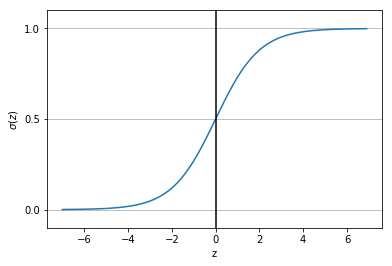

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)


## Logistic regression training

The logistic regression model is trained using gradient descent by  minimizing the cost function $J(\mathbf{\Theta})$ w.r.t. $\mathbf{\Theta},\,\,$ where $\mathbf{\Theta}=\{\mathbf{w};\,b\}$

Let 

$\mathbf{X}=\{\mathbf{x}^{(1)},...,\mathbf{x}^{(m)}\}$, where $\mathbf{x}\in\mathbb{R}^n$ 

$\mathbf{Y}=\{y^{(1)},...,y^{(m)}\}$, where $y\in\{0,1\}$ 

be a training dataset. 

The likelihood is defined as:

$P(\mathbf{Y}|\mathbf{X};\mathbf{\Theta})$

If the observations are independent and identically distributed then:

$P(\mathbf{Y}|\mathbf{X};\mathbf{\Theta})=\prod_{i=1}^m P(y^{(i)}|\mathbf{x}^{(i)};\mathbf{\Theta})=\prod_{i=1}^m (\sigma(z^{(i)}))^{y^{(i)}} (1-\sigma(z^{(i)}))^{1-y^{(i)}}$

For numerical stability when calculating gradients it is better to optimize the (natural) log of this equation. So the final optimization objective is to minimize the cost function defined as negative log-likelihood, also referred to as binary cross-entropy.

$\mathbf{\Theta_{ML}} = \underset{\mathbf{\Theta}}\arg\min\, J(\mathbf{\Theta})=\underset{\mathbf{\Theta}}\arg\min\, \sum_{i=1}^m -y^{(i)}\log(\sigma(z^{(i)}))-(1-y^{(i)})\log(1-\sigma(z^{(i)}))$



## Logistic regression training


The cost function can be minimized using gradient descent. 

$\mathbf{\Theta}\leftarrow\mathbf{\Theta}-\eta\nabla_{\mathbf{\Theta}}J(\mathbf{\Theta})\,\,$ where $\nabla_{\mathbf{\Theta}}J(\mathbf{\Theta})$ is a gradient of the cost function w.r.t $\mathbf{\Theta}$ and $\eta$ is a learning rate.

Let $L(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w})=-y^{(i)}\log(\sigma(z^{(i)}))-(1-y^{(i)})\log(1-\sigma(z^{(i)}))$ be a per-example loss. Then:


$\nabla_{\mathbf{\Theta}}J(\mathbf{\Theta})=\frac{1}{m}\sum_{i=1}^m \nabla_{\mathbf{\Theta}} L(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{\Theta})=\frac{1}{m}\sum_{i=1}^m \nabla L^{(i)}(\mathbf{\Theta})=\frac{1}{m}\sum_{i=1}^m \nabla L^{(i)}(\mathbf{w},b)$ 



$\nabla L^{(i)}(\mathbf w, b)=\begin{bmatrix} \dfrac{\partial{L^{(i)}(\mathbf{w},b)}}{\partial w_1} \\ \vdots \\ \dfrac{\partial{L^{(i)}(\mathbf{w},b)}}{\partial w_n} \\ \dfrac{\partial L^{(i)}(\mathbf{w},b)}{\partial b} \end{bmatrix} $

To calculate partial derivates you can apply the chain rule:

Let $a^{(i)}=\sigma( z^{(i)})$

$\dfrac{\partial L^{(i)}}{\partial w_j}=\dfrac{\partial L^{(i)}}{\partial a^{(i)}} \dfrac{\partial a^{(i)}}{\partial z^{(i)}} \dfrac{\partial z^{(i)}}{\partial w_{j}}$

$\dfrac{\partial L^{(i)}}{\partial a}=-\dfrac{y^{(i)}}{a^{(i)}}+\dfrac{1-y^{(i)}}{1-a^{(i)}},\,\,\,\,
\dfrac{\partial a^{(i)}}{\partial z^{(i)}}=a^{(i)}(1-a^{(i)}),\,\,\,\,\,
\dfrac{\partial z^{(i)}}{\partial w_j}= x_j^{(i)},\,\,\,\,
\dfrac{\partial z^{(i)}}{\partial b}= 1$

Which yields

$\dfrac{\partial L^{(i)}}{\partial w_j}=(a^{(i)}-y^{(i)})x_j^{(i)},\,\,\,
\dfrac{\partial L^{(i)}}{\partial b}=a^{(i)}-y^{(i)}$
